# **BINOMIAL PRICING MODEL**

[Binomial pricing basics](https://www.investopedia.com/terms/b/binomialoptionpricing.asp)

In [54]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")
import math as m

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [56]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)


# Read data
df = yf.download(symbol,start,end)

df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-18,4760.100098,4785.790039,4740.569824,4780.939941,4780.939941,4019000000
2024-01-19,4796.279785,4842.069824,4785.870117,4839.810059,4839.810059,4287200000
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4850.430176,4297610000
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,4864.600098,3912800000
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000


In [57]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-25,4366.640137,4411.009766,4287.109863,4356.450195,4356.450195,5145050000
2022-01-26,4408.430176,4453.229980,4304.799805,4349.930176,4349.930176,5570640000
2022-01-27,4380.580078,4428.740234,4309.500000,4326.509766,4326.509766,5214200000
2022-01-28,4336.189941,4432.720215,4292.459961,4431.850098,4431.850098,5031090000
2022-01-31,4431.790039,4516.890137,4414.020020,4515.549805,4515.549805,5098610000


In [58]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [59]:
dfo.options  #to get the date of different expiration time

('2024-01-25',
 '2024-01-26',
 '2024-01-29',
 '2024-01-30',
 '2024-01-31',
 '2024-02-01',
 '2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-08',
 '2024-02-09',
 '2024-02-12',
 '2024-02-13',
 '2024-02-14',
 '2024-02-15',
 '2024-02-16',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [60]:
dfo_exp = dfo.option_chain(dfo.options[1])

In [61]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240126C01200000,2024-01-22 17:17:03+00:00,1200.0,3652.89,3673.1,3674.5,0.0,0.0,7.0,12,5.742190,True,REGULAR,USD
1,SPXW240126C03100000,2024-01-19 19:35:22+00:00,3100.0,1734.66,1774.3,1775.6,0.0,0.0,1.0,1,2.225102,True,REGULAR,USD
2,SPXW240126C03750000,2024-01-03 17:29:39+00:00,3750.0,975.59,1124.5,1125.9,0.0,0.0,1.0,1,1.404056,True,REGULAR,USD
3,SPXW240126C03800000,2024-01-18 15:01:55+00:00,3800.0,957.59,1073.8,1075.1,0.0,0.0,1.0,0,1.070317,True,REGULAR,USD
4,SPXW240126C04000000,2024-01-22 18:49:56+00:00,4000.0,855.00,873.9,875.2,0.0,0.0,2.0,1606,0.928712,True,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [62]:
#Calculation of daily returns
ret = df.Close.pct_change()
ret=ret.dropna()
ret

Date
2022-01-26   -0.001497
2022-01-27   -0.005384
2022-01-28    0.024348
2022-01-31    0.018886
2022-02-01    0.006863
                ...   
2024-01-18    0.008805
2024-01-19    0.012314
2024-01-22    0.002194
2024-01-23    0.002921
2024-01-24    0.000812
Name: Close, Length: 501, dtype: float64

In [63]:
ret.head()

Date
2022-01-26   -0.001497
2022-01-27   -0.005384
2022-01-28    0.024348
2022-01-31    0.018886
2022-02-01    0.006863
Name: Close, dtype: float64

In [64]:
#Calculation of daily standard deviation
daily_vol = ret.std()

In [65]:
daily_vol

0.012169197145718895

In [66]:
#Calculate annual volatility from daily volatility
vol = daily_vol*(m.sqrt(252))

In [67]:
vol

0.19318001581733546

In [68]:
dfo.options[1]

'2024-01-26'

In [69]:
date.today()

datetime.date(2024, 1, 25)

In [70]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [71]:
u = m.exp(daily_vol*m.sqrt(t))
u

1.0001801771073195

In [72]:
d = m.exp(-1*daily_vol*m.sqrt(t))
d

0.9998198553506222

# Binomial Pricing model for call option

Let S denote the price of the stock today, and let T denote the time until expiry of the option, in years. We'll divide this period into N equal time intervals, of length ΔT=T/N Assume that in each time period, the stock price changes by either multiplying by u, which we consider as an up movement, or by d, the down movement. We need to assume d<erΔT<u, where r is the risk-free interest rate, to avoid the possibility of arbitrage. If k time periods have passed, m is number if up movement : S(k,m)=S * u ** m * d ** (k-m)

C(N,m)=max(S(N,m)−K,0)

Once we know the value of the option at the end of the tree, we can work backward as before to figure out the value of the option at every node. Let C(k,m) denote the value of the option at the node that is k steps into the tree with m up movements in the stock price. The two following nodes in the tree are C(k+1,m+1) (if the price moves up) and C(k+1,m) (if the price moves down). If we let p denote the risk-neutral probability

p = (e**(rΔT)−d)/(u−d)

of a movement up, then the expected value of the option in the next step is pC(k+1,m+1)+(1−p)C(k+1,m)

and so the value of the option at C(k,m) is the above expected value, discounted to today using the risk-free interest rate. That is

C(k,m)=e−rΔT(pC(k+1,m+1)+(1−p)C(k+1,m))

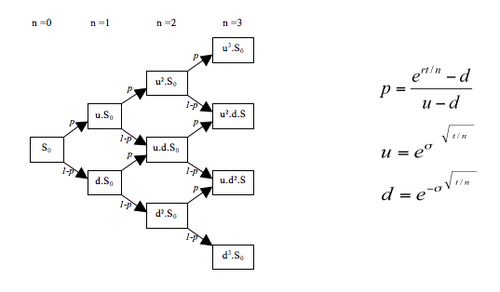

In [79]:
def first_binomial_call(S, K, T, r, u, d, N):
  """
    Implementation of binomial pricing model

    Parameters
    ----------
    S : float
        stock price
    K : float
        strike price
    T : float
        expiry time in years
    r : float
        risk free rate which could be taken out of the yield of US treasury bonds
    u : float
        size of upfactor move
    d : float
        size of downfactor move
    N : int
        number of steps in binomial model
    Returns
    -------
    C : dict
        the binary pricing model in the form of dictionary
  """

  # Step 1: Compute delta t
  delta_t = T / N
  # Step 2: Compute risk-neutral probability
  p = (m.exp(r * delta_t) - d) / (u - d)
  # Initialize a dictionary to store option prices at each node
  C = {}
  for j in range(N + 1):
      S_j = S * (u ** j) * (d ** (N - j))
      C[(N, j)] = max(0, S_j - K)  # Option value at expiration (European Call)

  # Step 4: Backward induction to compute option prices at earlier nodes
  for i in range(N - 1, -1, -1):
      for j in range(i + 1):
          S_j = S * (u ** j) * (d ** (i - j))
          C[(i, j)] = m.exp(-r * delta_t) * (p * C[(i + 1, j + 1)] + (1 - p) * C[(i + 1, j)])
  return C


In [80]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = first_binomial_call(S = df['Close'][len(df)-1], K = K, T = T, r=0.01*t, u = u, d =d, N=N)[(1, 1)]
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call

,th_call
1200.0,3669.427063
3100.0,1769.427153
3750.0,1119.427184
3800.0,1069.427187
4000.0,869.427196
...,...
5300.0,0.000000
5350.0,0.000000
5400.0,0.000000
5600.0,0.000000


In [81]:
#price of actual calls
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call

,ac_call
strike,
1200.0,3652.89
3100.0,1734.66
3750.0,975.59
3800.0,957.59
4000.0,855.00
...,...
5300.0,0.05
5350.0,0.05
5400.0,0.05


In [82]:
call = th_call
call["ac_call"] = ac_call
call

,th_call,ac_call
1200.0,3669.427063,3652.89
3100.0,1769.427153,1734.66
3750.0,1119.427184,975.59
3800.0,1069.427187,957.59
4000.0,869.427196,855.00
...,...,...
5300.0,0.000000,0.05
5350.0,0.000000,0.05
5400.0,0.000000,0.05
5600.0,0.000000,0.05


<Axes: >

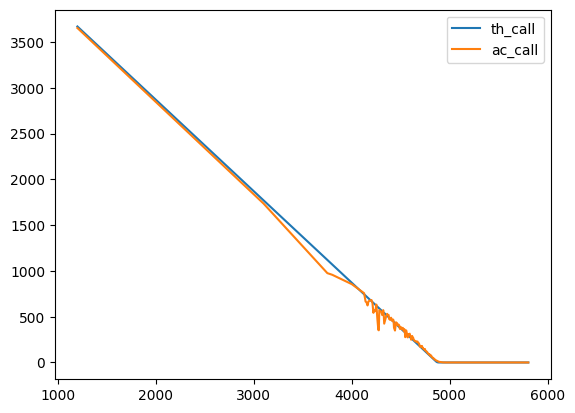

In [83]:
call.plot() #plotting the actual and theoretical option prices